In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
from glob import glob
filenames = glob('data/*.csv')
dfs = [pd.read_csv(f) for f in filenames]
df = pd.merge(dfs[1], dfs[3], on='department_id', how='left')
df = pd.merge(df, dfs[4], on='aisle_id', how='left')
df = pd.merge(df, dfs[0], on='product_id', how='right')
df = pd.merge(df, dfs[2], on='order_id', how='left')
cols = ['order_id','user_id','order_number','add_to_cart_order',
 'product_id','product_name','department_id','department','aisle_id','aisle',
 'order_dow','order_hour_of_day','days_since_prior_order']
df = df[cols]
df

,order_id,user_id,order_number,add_to_cart_order,product_id,product_name,department_id,department,aisle_id,aisle,order_dow,order_hour_of_day,days_since_prior_order
0,1107,38259,2,7,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,1,11,7.0
1,5319,196224,65,3,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,1,14,1.0
2,7540,138499,8,4,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,0,14,7.0
3,9228,79603,2,2,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,2,10,30.0
4,9273,50005,1,30,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,1,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,3401313,200377,1,5,49688,Fresh Foaming Cleanser,11,personal care,73,facial care,4,11,NaN
33819102,655800,159099,10,10,49688,Fresh Foaming Cleanser,11,personal care,73,facial care,4,14,23.0
33819103,2198380,40460,7,10,49688,Fresh Foaming Cleanser,11,personal care,73,facial care,3,14,30.0
33819104,2508423,187233,7,3,49688,Fresh Foaming Cleanser,11,personal care,73,facial care,6,21,13.0


In [3]:
grouped = df.groupby(["user_id", "aisle"])["order_number"].aggregate(["count"]).reset_index()
grouped = grouped.pivot_table('count', 'user_id', 'aisle').reset_index()
grouped

aisle,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,2,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,3.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,42.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
4,5,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206205,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
206205,206206,NaN,4.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
206206,206207,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,2.0,1.0,NaN,NaN,11.0,NaN,15.0
206207,206208,NaN,3.0,NaN,NaN,3.0,NaN,4.0,NaN,NaN,...,5.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,33.0


In [11]:
# fill NaN with 0
grouped.fillna(0, inplace=True)
dataframe = grouped
dataframe

aisle,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
206205,206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
206206,206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,4.0,0.0,2.0,1.0,0.0,0.0,11.0,0.0,15.0
206207,206208,0.0,3.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,...,5.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,33.0


In [12]:
# Build k-means model <k=5>
kmeans = KMeans(n_clusters=5, random_state=0)
y_predict = kmeans.fit_predict(dataframe.iloc[:,2:])

dataframe['cluster'] = y_predict
dataframe.head(10)

aisle,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
1,2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0,4
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
5,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4
7,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,9,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,28.0,0
9,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4


In [13]:
# Evaluation
k_range = range(1,15)
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataframe.iloc[:,2:])
    sse.append(kmeans.inertia_)
sse

[866438108.822776,
 595520846.0822581,
 524831268.6032367,
 495366461.2112374,
 472534976.40197146,
 456673186.4217348,
 443122298.6059453,
 432373488.35281616,
 423436619.2172523,
 414730076.55648685,
 408183011.0875587,
 402025127.7967887,
 395525177.10518485,
 390044322.6156303]

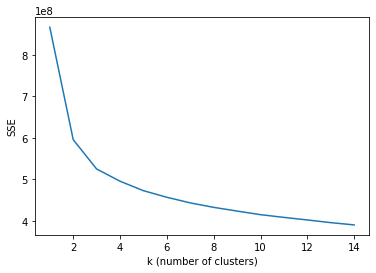

In [14]:
plt.xlabel("k (number of clusters)")
plt.ylabel("SSE")
plt.plot(k_range, sse)